In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [95]:
df = pd.read_csv('processed_data.csv')
pred = pd.read_csv('predicted_housing_prices.csv')

df.head(), pred.head()

(   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
 0   1          60         3           65     8450       1         3   
 1   2          20         3           80     9600       1         3   
 2   3          60         3           68    11250       1         0   
 3   4          70         3           60     9550       1         0   
 4   5          60         3           84    14260       1         0   
 
    LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
 0            3          0          4  ...              0          0   
 1            3          0          2  ...              0          0   
 2            3          0          4  ...              0          0   
 3            3          0          0  ...            272          0   
 4            3          0          2  ...              0          0   
 
    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
 0            0         0        0       2    2008   

In [97]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

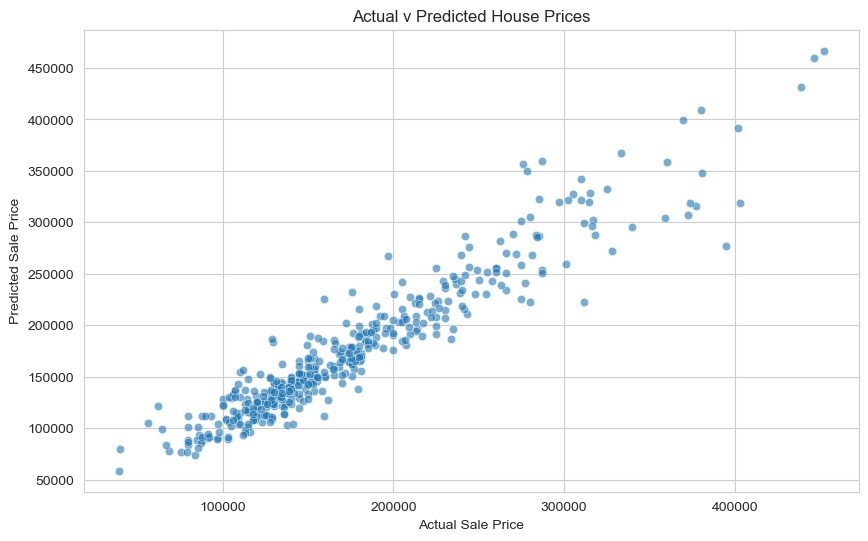

In [99]:
sns.scatterplot(x = pred["Actual_Price"], y = pred["Predicted_Price"], alpha = 0.6)
plt.title("Actual v Predicted House Prices")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

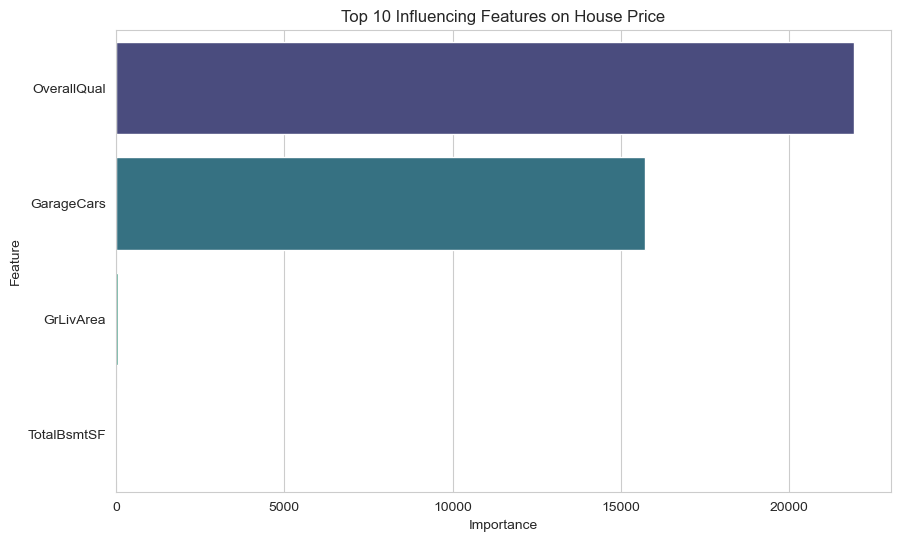

In [101]:
### KEY VISAULS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model_lr = LinearRegression()
model_lr.fit(x, y)
 
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': np.abs(model_lr.coef_)
}).sort_values(by = 'Importance', ascending = False)

sns.barplot(data = importance.head(10), x = 'Importance', y = 'Feature', palette = 'viridis')
plt.title("Top 10 Influencing Features on House Price")
plt.show()

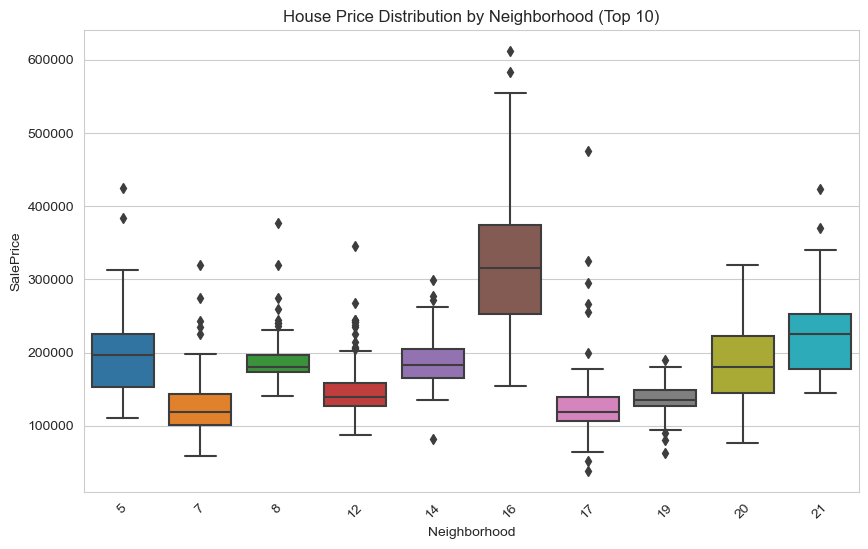

In [103]:
top_ngbrhd = df['Neighborhood'].value_counts().head(10).index
sns.boxplot(data = df[df['Neighborhood'].isin(top_ngbrhd)], x = 'Neighborhood', y = 'SalePrice')
plt.title("House Price Distribution by Neighborhood (Top 10)")
plt.xticks(rotation = 45)
plt.show()

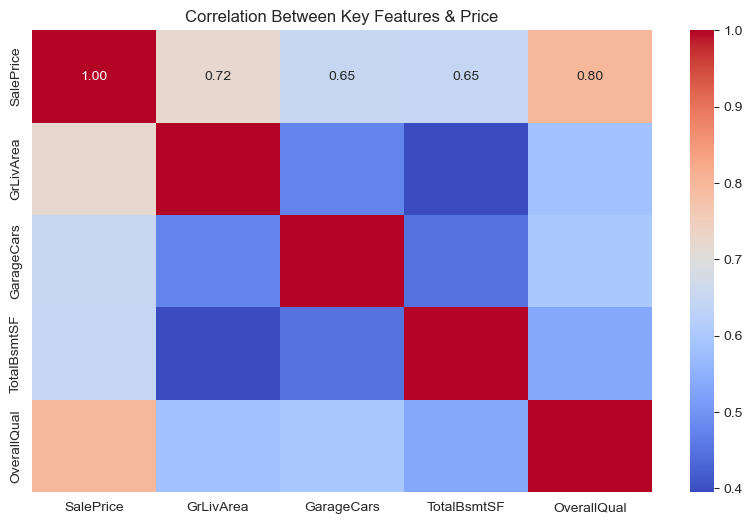

In [105]:
corr = df[['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Between Key Features & Price")
plt.show()

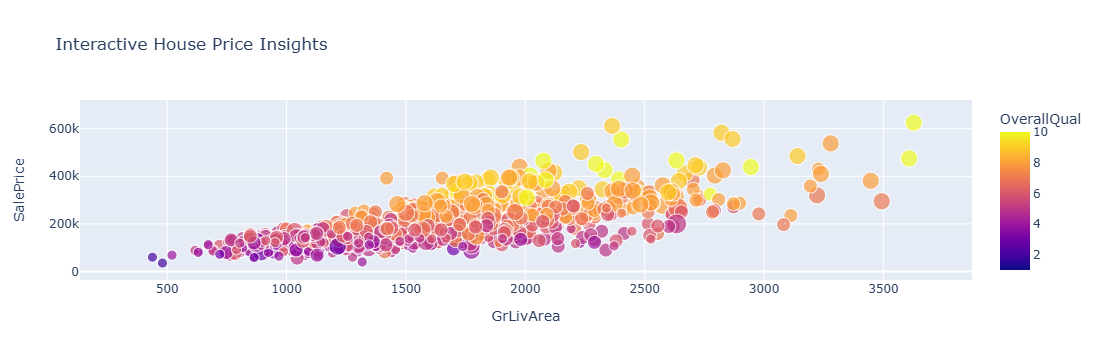

In [107]:
fig = px.scatter(df, x = "GrLivArea", y = "SalePrice", color = "OverallQual", size = "GarageCars", hover_data = ["Neighborhood"], 
                 title = "Interactive House Price Insights")
fig.show()